In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Comparison between RNA circuits and classical, activation / repression circuits

RNA circuits can only bind to each other. Does this mean that all RNAs are essentially repressing each other indirectly? 

# Imports

In [5]:
import networkx as nx
import numpy as np
import jax 
import jax.numpy as jnp 
import matplotlib.pyplot as plt

In [6]:
n_nodes = 5
w = jax.random.normal(jax.random.PRNGKey(0), (n_nodes, n_nodes))


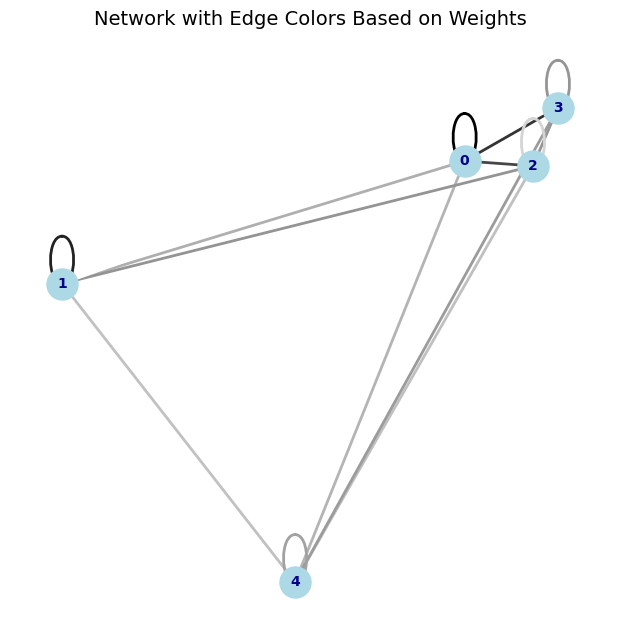

In [14]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(w)

# Extract edge weights
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

# Normalize edge weights for coloring
min_weight = min(weights)
max_weight = max(weights)
normalized_weights = [(weight - min_weight) / (max_weight - min_weight) for weight in weights]

# Map weights to grayscale (darker for higher weights)
edge_colors = [(1 - norm, 1 - norm, 1 - norm) for norm in normalized_weights]

# Draw the graph with custom edge colors
plt.figure(figsize=(6, 6))  # Set the figure size
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(
    G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, 
    font_color='darkblue', font_weight='bold', edge_color=edge_colors, width=2
)
plt.title("Network with Edge Colors Based on Weights", fontsize=14)
plt.show()


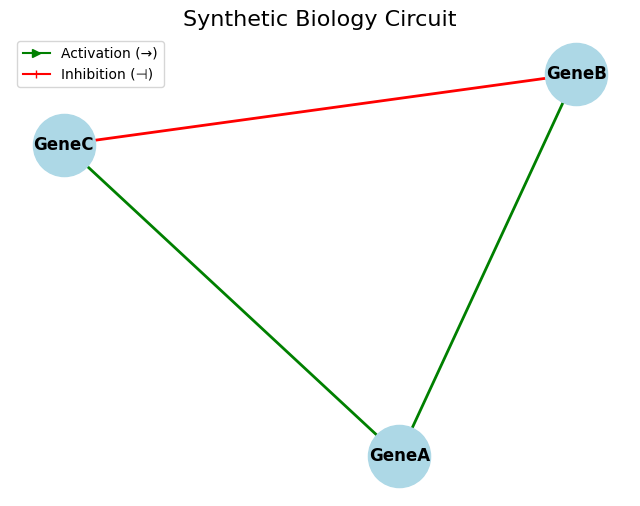

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for the synthetic biology circuit
G = nx.DiGraph()

# Add nodes (representing components like genes, proteins, or promoters)
G.add_node("GeneA")
G.add_node("GeneB")
G.add_node("GeneC")

# Add edges with attributes for activation or inhibition
# Format: G.add_edge(source, target, interaction="type")
G.add_edge("GeneA", "GeneB", interaction="activation")
G.add_edge("GeneB", "GeneC", interaction="inhibition")
G.add_edge("GeneC", "GeneA", interaction="activation")

# Define edge styles based on interaction type
edge_styles = []
for u, v, data in G.edges(data=True):
    if data["interaction"] == "activation":
        edge_styles.append((u, v, "arrow"))  # Activation: arrow
    elif data["interaction"] == "inhibition":
        edge_styles.append((u, v, "bar"))  # Inhibition: blunt-end

# Draw the graph
pos = nx.spring_layout(G)  # Layout for nodes
plt.figure(figsize=(8, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000)

# Draw edges with specific styles
for u, v, style in edge_styles:
    if style == "arrow":
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], arrows=True, arrowstyle="->", edge_color="green", width=2)
    elif style == "bar":
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], arrows=True, arrowstyle="-|>", edge_color="red", width=2)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Add legend for activation and inhibition
plt.plot([], [], color="green", label="Activation (→)", linestyle="-", marker=">")
plt.plot([], [], color="red", label="Inhibition (⊣)", linestyle="-", marker="|")

plt.legend(loc="upper left", fontsize=10)
plt.title("Synthetic Biology Circuit", fontsize=16)
plt.axis("off")  # Turn off axis
plt.show()


In [18]:
from pyvis.network import Network
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("GeneA")
G.add_node("GeneB")
G.add_node("GeneC")

# Add edges with interaction types
G.add_edge("GeneA", "GeneB", interaction="activation")
G.add_edge("GeneB", "GeneC", interaction="inhibition")
G.add_edge("GeneC", "GeneA", interaction="activation")

# Initialize a Pyvis network
net = Network(notebook=True, directed=True)

# Add nodes to the Pyvis network
for node in G.nodes:
    net.add_node(node, label=node, shape="circle", color="lightblue")

# Add edges with custom styles
for u, v, data in G.edges(data=True):
    if data["interaction"] == "activation":
        net.add_edge(u, v, title="Activation", color="green", arrows="to")
    elif data["interaction"] == "inhibition":
        net.add_edge(u, v, title="Inhibition", color="red", arrows="to", arrowStrikethrough=False)

# Configure network settings
net.repulsion(node_distance=150, spring_length=200)
net.show_buttons(filter_=["physics"])  # Show interactive controls for layout
net.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 12
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "smooth": {
      "enabled": false
    }
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -2000,
      "springLength": 200
    }
  }
}
""")

# Save and display the network
net.show("synthetic_biology_circuit.html")


synthetic_biology_circuit.html
